In [7]:
import matplotlib.pyplot as plt
import numpy as np

from mesa import Agent, Model
from mesa.datacollection import DataCollector

In [14]:
from model_classes import ContentMarketModel
from constants import *

# Ensure results are reproducible
np.random.seed(0)

num_steps = 25
num_members = 50
M = 10.0
M_INFL = 50.0
mems_alloc = np.random.rand(num_members, num_members + 2)
infl_alloc = np.random.rand(num_members)
prod_topics = np.random.rand(num_members)

perf_model = ContentMarketModel(mems_alloc, infl_alloc, prod_topics, num_steps, num_members, M, M_INFL, True)
lim_model = ContentMarketModel(mems_alloc, infl_alloc, prod_topics, num_steps, num_members, M, M_INFL, False)

for i in range(num_steps):
    print(f'Starting step {i}')
    perf_model.step()
    lim_model.step()

perf_agent_df = perf_model.datacollector.get_agent_vars_dataframe()
perf_model_df = perf_model.datacollector.get_model_vars_dataframe()

lim_agent_df = lim_model.datacollector.get_agent_vars_dataframe()
lim_model_df = lim_model.datacollector.get_model_vars_dataframe()

Starting step 0
Starting step 1
Starting step 2
Starting step 3
Starting step 4
Starting step 5
Starting step 6
Starting step 7
Starting step 8
Starting step 9
Starting step 10
Starting step 11
Starting step 12
Starting step 13
Starting step 14
Starting step 15
Starting step 16
Starting step 17
Starting step 18
Starting step 19
Starting step 20
Starting step 21
Starting step 22
Starting step 23
Starting step 24


In [15]:
perf_agent_df

Consumer Utility  Producer Social Support  Influencer Utility
Step AgentID                                                               
0    0                0.000000                 0.000000                 NaN
     1                0.000000                 0.000000                 NaN
     2                0.000000                 0.000000                 NaN
     3                0.000000                 0.000000                 NaN
     4                0.000000                 0.000000                 NaN
...                        ...                      ...                 ...
24   46               8.350937                 8.108184                 NaN
     47              11.672397                 7.811262                 NaN
     48               9.712280                10.595849                 NaN
     49               7.614672                 0.000000                 NaN
     50                    NaN                      NaN          353.722034

[1275 rows x 3 columns]

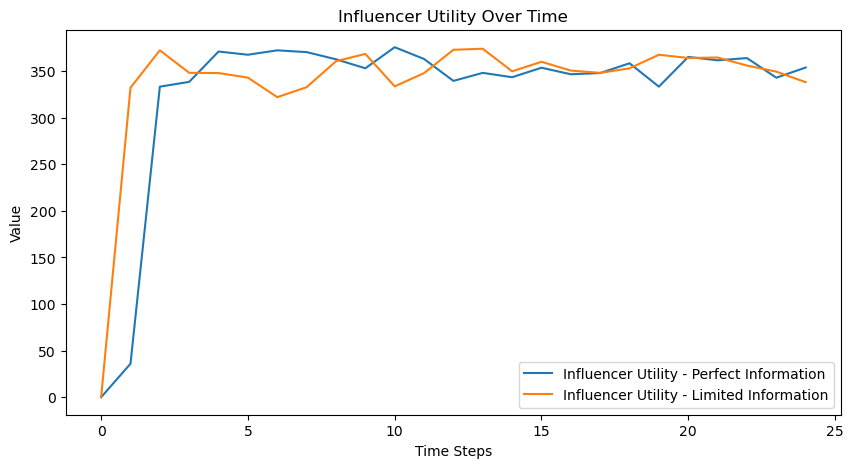

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(perf_agent_df["Influencer Utility"].loc[(slice(None),num_members)], label="Influencer Utility - Perfect Information")
plt.plot(lim_agent_df["Influencer Utility"].loc[(slice(None),num_members)], label="Influencer Utility - Limited Information")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.title("Influencer Utility Over Time")
plt.show()

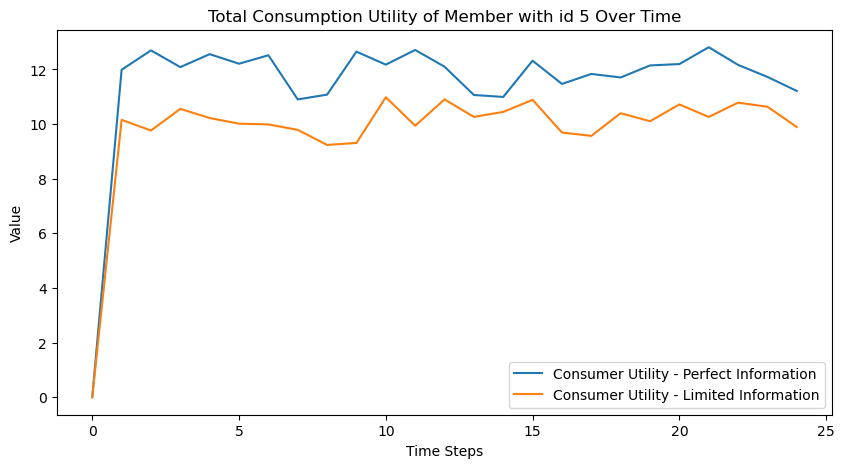

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(perf_agent_df["Consumer Utility"].loc[(slice(None),5)], label="Consumer Utility - Perfect Information")
plt.plot(lim_agent_df["Consumer Utility"].loc[(slice(None),5)], label="Consumer Utility - Limited Information")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.title("Total Consumption Utility of Member with id 5 Over Time")
plt.show()

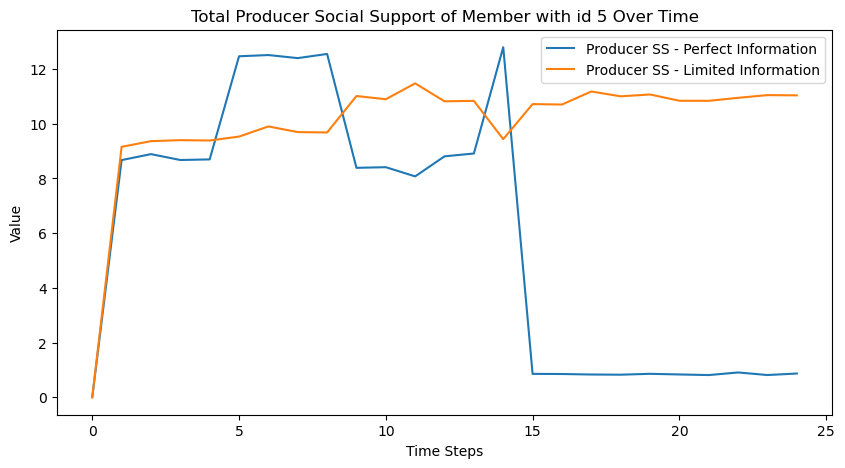

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(perf_agent_df["Producer Social Support"].loc[(slice(None),5)], label="Producer SS - Perfect Information")
plt.plot(lim_agent_df["Producer Social Support"].loc[(slice(None),5)], label="Producer SS - Limited Information")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.title("Total Producer Social Support of Member with id 5 Over Time")
plt.show()

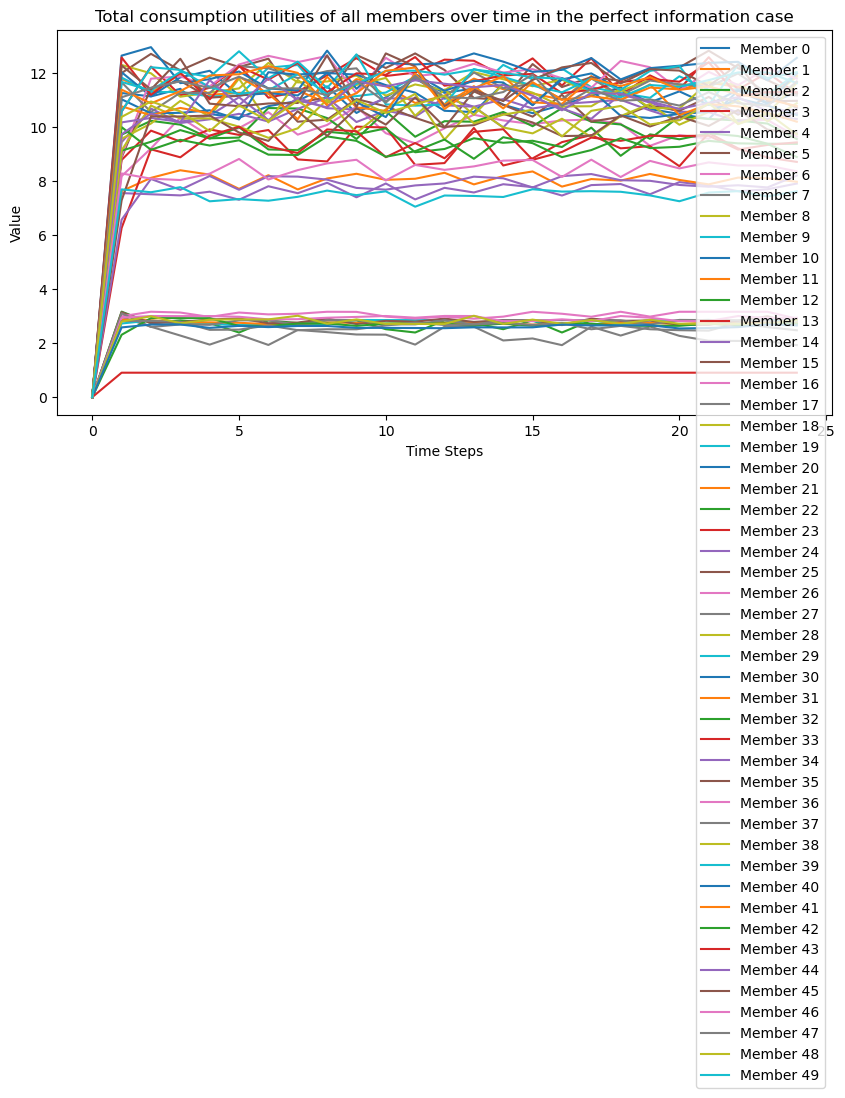

In [28]:
plt.figure(figsize=(10, 5))
for i in range(num_members):
    plt.plot(perf_agent_df["Consumer Utility"].loc[(slice(None),i)], label=f"Member {i}")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.title("Total consumption utilities of all members over time (in the case of perfect information)")
plt.show()

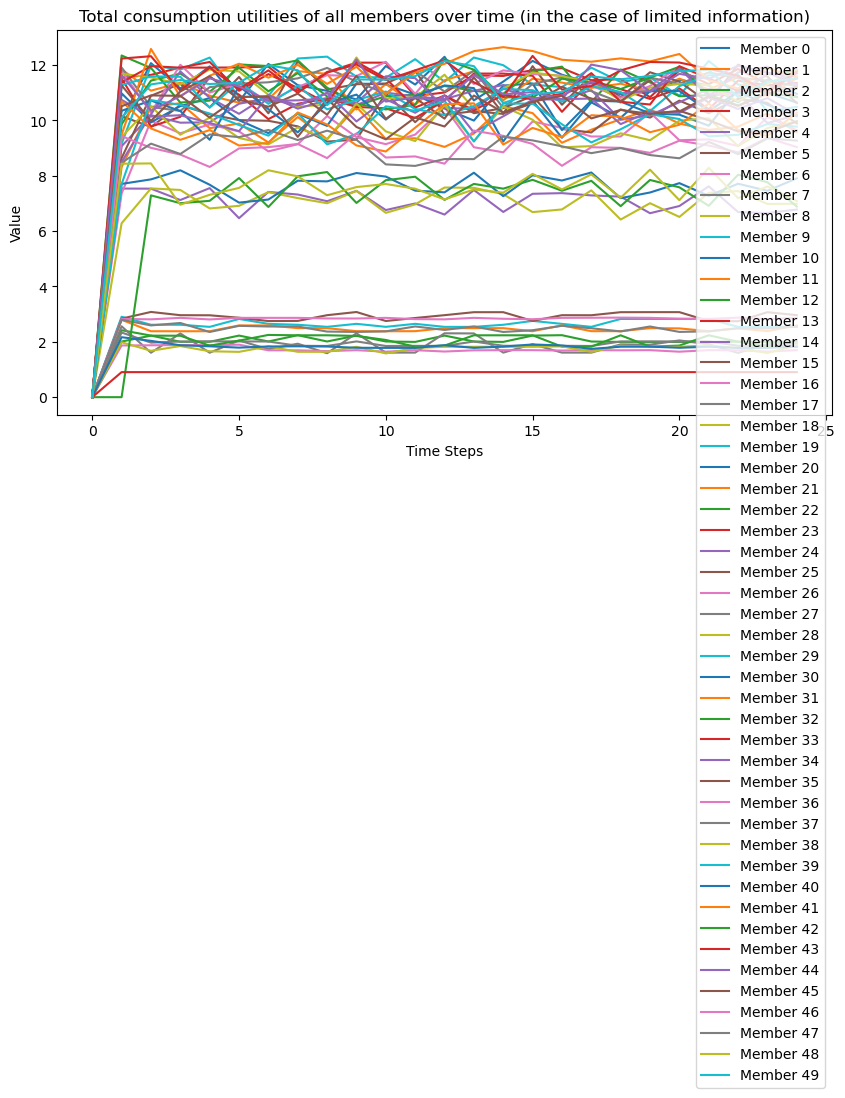

In [29]:
plt.figure(figsize=(10, 5))
for i in range(num_members):
    plt.plot(lim_agent_df["Consumer Utility"].loc[(slice(None),i)], label=f"Member {i}")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.title("Total consumption utilities of all members over time (in the case of limited information)")
plt.show()

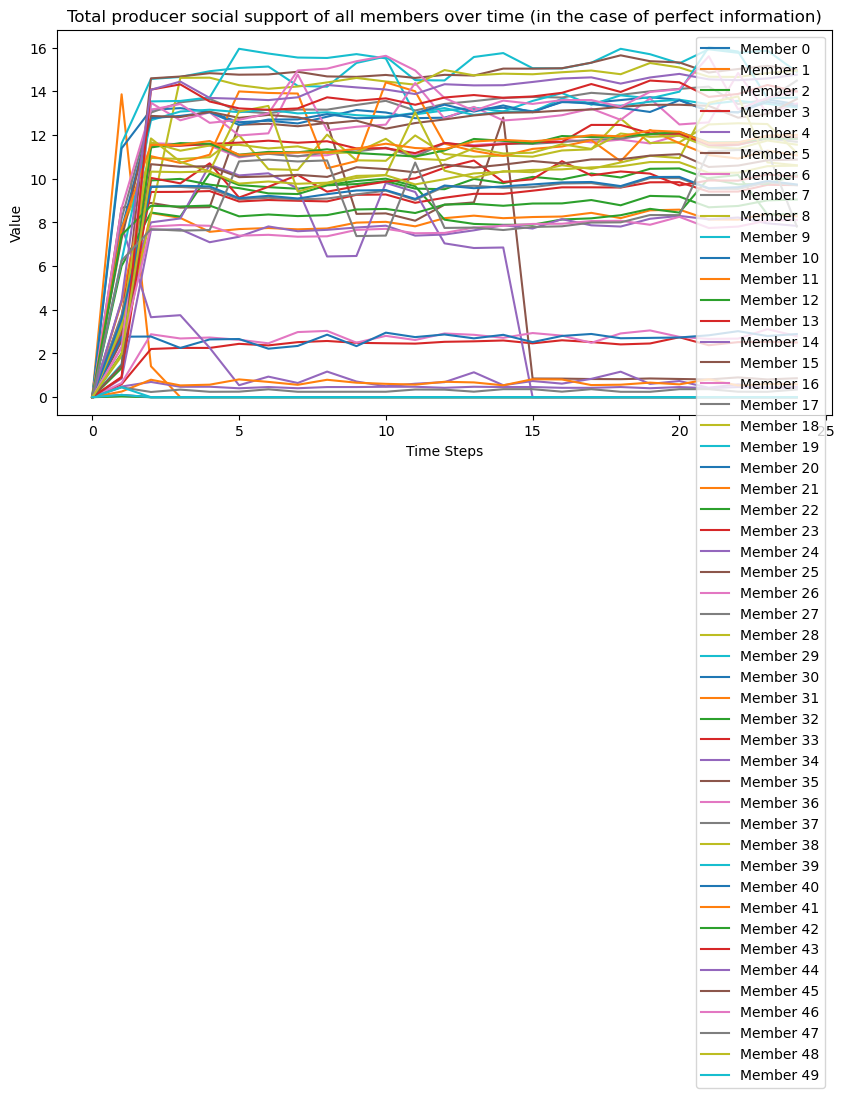

In [30]:
plt.figure(figsize=(10, 5))
for i in range(num_members):
    plt.plot(perf_agent_df["Producer Social Support"].loc[(slice(None),i)], label=f"Member {i}")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.title("Total producer social support of all members over time (in the case of perfect information)")
plt.show()

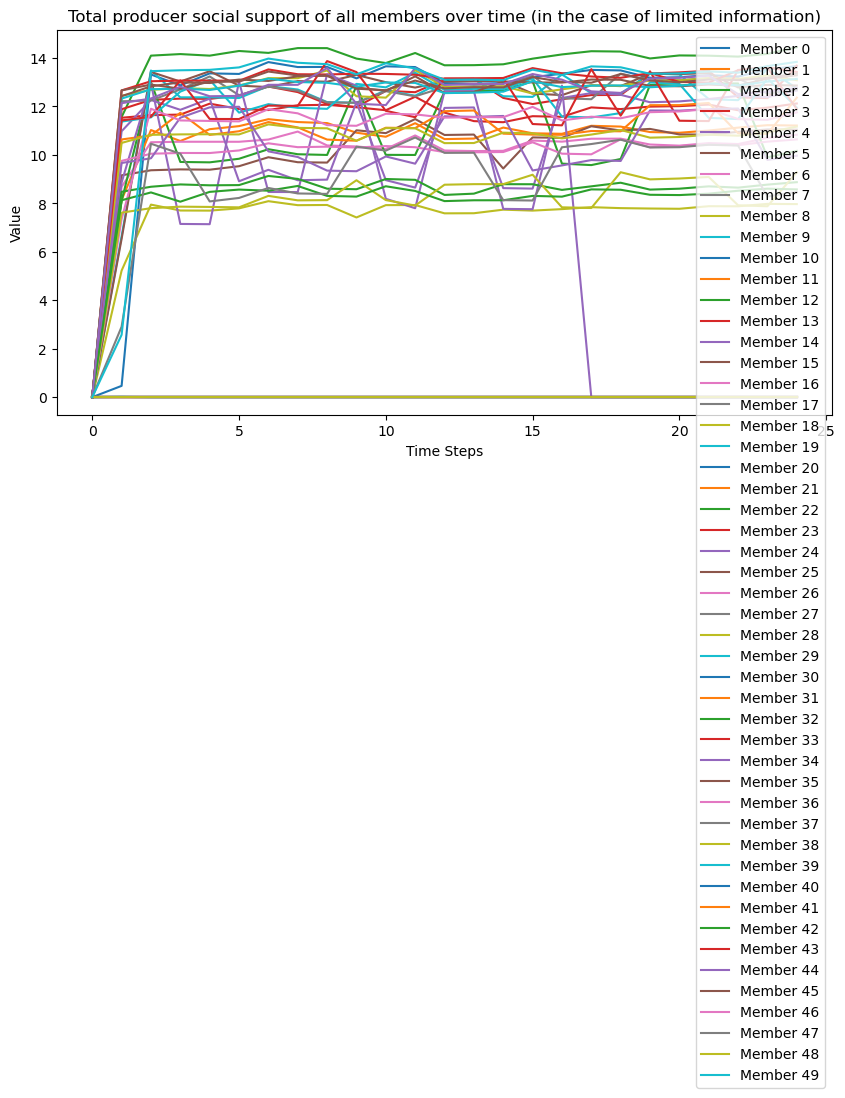

In [31]:
plt.figure(figsize=(10, 5))
for i in range(num_members):
    plt.plot(lim_agent_df["Producer Social Support"].loc[(slice(None),i)], label=f"Member {i}")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.title("Total producer social support of all members over time (in the case of limited information)")
plt.show()